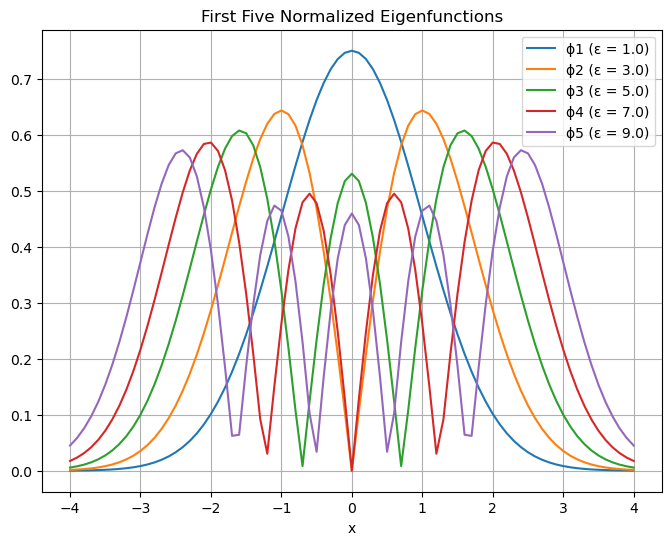

[0.99999998 2.9999994  4.99998953 6.99988317 8.99906061]
[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588473e-02
  4.50516581e-02]
 [3.76940965e-04 2.08377489e-03 7.88695716e-03 2.35399838e-02
  5.86293690e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583001e-02
  7.58483958e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281002e-02
  9.71899061e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048286e-02
  1.23080898e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653847e-02
  1.53831231e-01]
 [2.32055909e-03 1.11600069e-02 3.63163648e-02 9.17795041e-02
  1.89559851e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171080e-01
  2.30113234e-01]
 [4.48904553e-03 2.03165046e-02 6.18486348e-02 1.45069151e-01
  2.74981544e-01]
 [6.15097107e-03 2.69674234e-02 7.92584568e-02 1.78649425e-01
  3.23220532e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868657e-01
  3.73389569e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395932e-01
 

In [11]:
#correct from HW 2, (a)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def bvpexam_rhs(y, x, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

L = 4 # Boundary limit
tol = 10**(-6) # convergence tolerance

B1 = np.zeros((81, 5))  # 81 grid points, 5 eigenfunctions
B2 = np.zeros(5)         # 5 eigenvalues

xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # grid of points for solving ODE
A = 0.1  # initial derivative value

# Iterate over 5 modes - find eigenfunctions and values associated
for i in range(1,6):
    dA = 0.1  # step size for derivative adjustment
    
    for j in range(1000):
                # Ensure sqrt argument is non-negative
        if A < L**2:
            y0 = [1, np.sqrt(L**2 - A)]  # initial condition based on current guess, make sure non-negative
        else:
            y0 = [1, 0]  # Avoid complex numbers in sqrt
        
        ysol = odeint(bvpexam_rhs, y0, x, args=(A,))  # solve ODE
        
        if abs(ysol[-1, 1] + np.sqrt(L**2 - A) * ysol[-1,0]) < tol:  # check convergence at the end
            break
        if (-1)**(i + 1) * (ysol[-1, 1] + np.sqrt(L**2 - A)*ysol[-1, 0]) > 0:  # adjust launch angle
            A += dA
        else:
            A -= dA
            dA /= 2  # refine search

    ysol_mode = np.abs(ysol[:,0] / np.sqrt(np.trapz(ysol[:,0]**2,x))) ## normalize
    
    B1[:, i-1] = ysol_mode # eigenfunction
  
    B2[i-1] = A # eigenvalue

    A+=.2

# Plot all five normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, B1[:, i], label=f'ϕ{i+1} (ε = {B2[i]:.1f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print(B2)
print(B1)

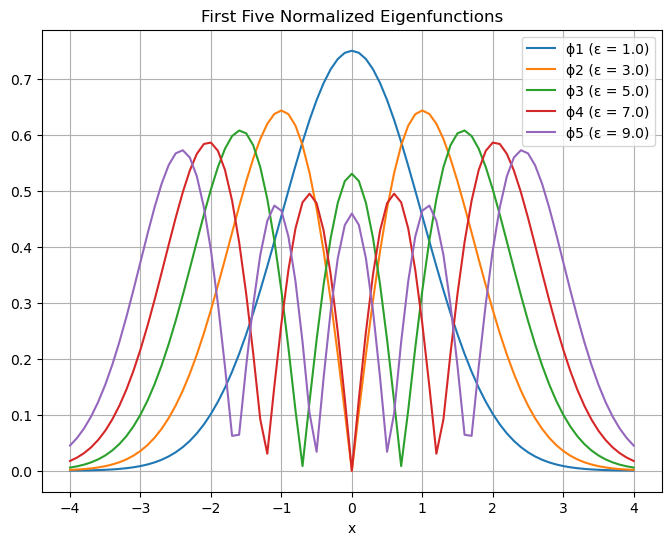

[0.99999991 2.99999923 4.99998925 6.99988278 8.99906002]
[[2.56183128e-04 1.45461608e-03 5.66710740e-03 1.74588436e-02
  4.50516740e-02]
 [3.76940526e-04 2.08377326e-03 7.88695328e-03 2.35399803e-02
  5.86293963e-02]
 [5.51714242e-04 2.96901597e-03 1.09156717e-02 3.15582974e-02
  7.58484391e-02]
 [8.01215167e-04 4.19588454e-03 1.49786747e-02 4.19280996e-02
  9.71899687e-02]
 [1.15311553e-03 5.87359257e-03 2.03472380e-02 5.51048303e-02
  1.23080969e-01]
 [1.64382551e-03 8.13892778e-03 2.73391666e-02 7.15653910e-02
  1.53831299e-01]
 [2.32055696e-03 1.11600024e-02 3.63163628e-02 9.17795209e-02
  1.89559984e-01]
 [3.24364131e-03 1.51394439e-02 4.76780804e-02 1.16171115e-01
  2.30113452e-01]
 [4.48904241e-03 2.03164985e-02 6.18486366e-02 1.45069181e-01
  2.74981741e-01]
 [6.15096681e-03 2.69674164e-02 7.92584594e-02 1.78649434e-01
  3.23220807e-01]
 [8.34442033e-03 3.54034003e-02 1.00317626e-01 2.16868751e-01
  3.73389948e-01]
 [1.12075117e-02 4.59653474e-02 1.25381535e-01 2.59396031e-01
 

In [13]:
# (a) A1 / A2 - Post TA Message - updated - seems accurate
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def bvpexam_rhs(x, y, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

L = 4  # Boundary limit
tol = 1e-6  # Convergence tolerance

A1 = np.zeros((81, 5))  # 81 grid points, 5 eigenfunctions
A2 = np.zeros(5)        # 5 eigenvalues

xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # Grid of points for solving ODE
A = 0.1  # Initial derivative value

# Iterate over 5 modes - find eigenfunctions and values associated
for i in range(1, 6):
    dA = 0.1  # Step size for derivative adjustment
    
    for j in range(1000):
        # Ensure sqrt argument is non-negative
        if A < L**2:
            y0 = [1, np.sqrt(L**2 - A)]  # Initial condition based on current guess
        else:
            y0 = [1, 0]  # Avoid complex numbers in sqrt
        
        # Solve ODE
        sol = solve_ivp(bvpexam_rhs, xspan, y0, args=(A,), t_eval=x, rtol=tol, atol=tol)
        
        # Check convergence at the end
        if abs(sol.y[1, -1] + np.sqrt(L**2 - A) * sol.y[0, -1]) < tol:
            break
        
        # Adjust launch angle
        if (-1)**(i + 1) * (sol.y[1, -1] + np.sqrt(L**2 - A) * sol.y[0, -1]) > 0:
            A += dA
        else:
            A -= dA
            dA /= 2  # Refine search

    # Normalize the eigenfunction
    ysol_mode = np.abs(sol.y[0] / np.sqrt(np.trapz(sol.y[0]**2, x)))
    
    # Save eigenfunction and eigenvalue
    A1[:, i-1] = ysol_mode  # Eigenfunction
    A2[i-1] = A  # Eigenvalue

    A += 0.2

# Plot all five normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A1[:, i], label=f'ϕ{i+1} (ε = {A2[i]:.1f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print(A2)
print(A1)

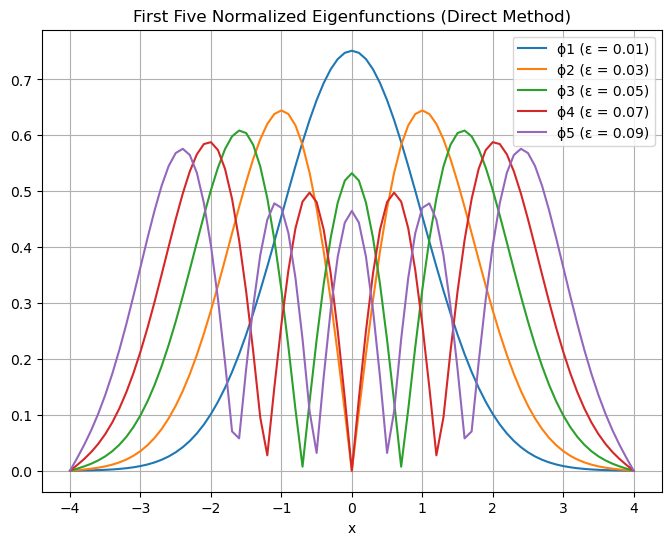

Eigenvalues (A4): [0.00999376 0.02996901 0.04992266 0.06987695 0.08993201]
Eigenfunctions (A3): [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.00809873e-04 1.04484759e-03 3.67929975e-03 1.00414458e-02
  2.23236307e-02]
 [4.30156082e-04 2.21730345e-03 7.73454056e-03 2.09085298e-02
  4.60350766e-02]
 [7.17317954e-04 3.64348753e-03 1.25205202e-02 3.33337814e-02
  7.22539608e-02]
 [1.09551195e-03 5.45927333e-03 1.83955013e-02 4.79931649e-02
  1.01866468e-01]
 [1.60473602e-03 7.81897191e-03 2.57361870e-02 6.55188467e-02
  1.35519814e-01]
 [2.29450291e-03 1.09021677e-02 3.49447367e-02 8.64923304e-02
  1.73586769e-01]
 [3.22658364e-03 1.49189268e-02 4.64483636e-02 1.11420508e-01
  2.16109347e-01]
 [4.47779363e-03 2.01132515e-02 6.06913914e-02 1.40696653e-01
  2.62731085e-01]
 [6.14277971e-03 2.67643989e-02 7.81193419e-02 1.74548684e-01
  3.12628553e-01]
 [8.33669748e-03 3.51855024e-02 9.91546357e-02 2.12977914e-01
  3.64454312e-01]
 [1.11976031e-02 4.57188

In [14]:
# eigenvalues off by about x0.01, (b) A3 / A4
# no idea why it's doing that
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 4  # boundary limit
N = 81  # number of grid points
x = np.linspace(-L, L, N)  # grid points
K = 1  # constant K = 1 (provided by problem)
dx = x[1] - x[0]  # step size

A3 = np.zeros((N, 5))  # matrix to store eigenfunctions
A4 = np.zeros(5)  # vector to store eigenvalues

b = np.zeros(N)
b[0] = 1
b[-1] = 1

D2 = np.zeros((N, N))  # second-derivative matrix (kinetic energy operator)

# Construct the matrix D2
for i in range(1, N-1):  # Loop over interior points (skip the first and last points)
    D2[i, i-1] = -1       # Fill subdiagonal (element to the left of the main diagonal)
    D2[i, i] = 2 + (dx**2) * (K * x[i]**2)  # Fill main diagonal with K * x[i]**2
    D2[i, i+1] = -1       # Fill superdiagonal (element to the right of the main diagonal)

# Modify D2 to handle boundary conditions properly
D2[0, 0] = 1  # Set first boundary point, 1 I think from pg 172,72
D2[0, 1] = 0  # Right of first boundary point, anything else provides a weird error

D2[-1,-1] = 1 # Set first boundary point, 1 I think from pg 172,72
D2[-1,-2] = 0 # Left of last boundary point, anything else provides a weird error

x_solution = np.linalg.solve(D2, b) # solve for x

eigenvalues, eigenfunctions = np.linalg.eig(D2) # Find the eigenvalues and eigenfunctions of D2

idx = np.argsort(eigenvalues) # Sort eigenvalues and eigenfunctions in ascending order
eigenvalues = eigenvalues[idx]
eigenfunctions = eigenfunctions[:, idx]

# Normalize the first five eigenfunctions and store them in A3
for i in range(5):
    # Normalization using the trapezoidal rule
    normalization_factor = np.sqrt(np.trapz(eigenfunctions[:, i]**2, x))
    
    # Normalize the eigenfunction
    A3[:, i] = np.abs(eigenfunctions[:, i]) / normalization_factor  # normalized eigenfunction
    
    # Store the eigenvalue
    A4[i] = eigenvalues[i]

# Plot all five normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A3[:, i], label=f'ϕ{i+1} (ε = {A4[i]:.2f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions (Direct Method)')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

# Output eigenvalues and eigenfunctions
print("Eigenvalues (A4):", A4)
print("Eigenfunctions (A3):", A3)

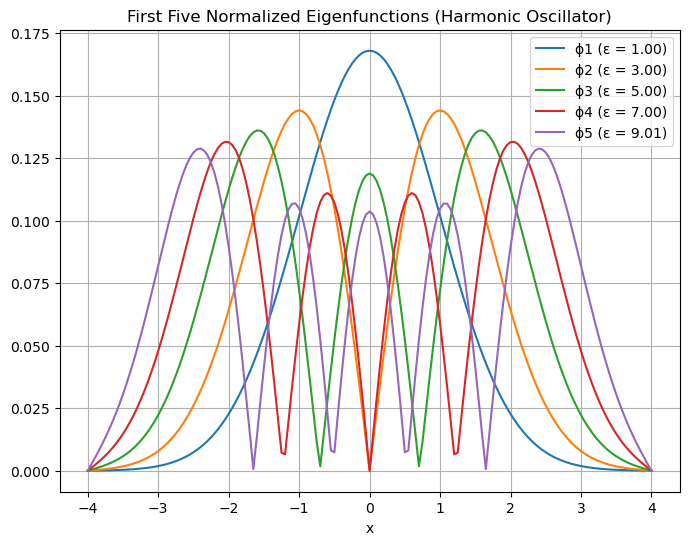

Eigenvalues (A4): [0.99984472 2.99924791 4.9983709  6.99946772 9.0127754 ]
Eigenfunctions (A3): [[8.77900485e-13 4.60452242e-12 1.63306756e-11 4.48447368e-11
  1.00196635e-10]
 [2.19475121e-05 1.15113061e-04 4.08266890e-04 1.12111842e-03
  2.50491587e-03]
 [4.46962533e-05 2.33853114e-04 8.27357050e-04 2.26634934e-03
  5.05109841e-03]
 [6.90328462e-05 3.59731973e-04 1.26756887e-03 3.45810009e-03
  7.67553793e-03]
 [9.57549821e-05 4.96243837e-04 1.73891259e-03 4.71748292e-03
  1.04114593e-02]
 [1.25694523e-04 6.46949207e-04 2.25130173e-03 6.06461720e-03
  1.32886441e-02]
 [1.59738824e-04 8.15547983e-04 2.81470609e-03 7.51883796e-03
  1.63335888e-02]
 [1.98850901e-04 1.00594381e-03 3.43927140e-03 9.09882128e-03
  1.95695232e-02]
 [2.44088906e-04 1.22230117e-03 4.13540907e-03 1.08226350e-02
  2.30163057e-02]
 [2.96625264e-04 1.46909613e-03 4.91385821e-03 1.27077203e-02
  2.66902146e-02]
 [3.57765724e-04 1.75116133e-03 5.78572139e-03 1.47708101e-02
  3.06036497e-02]
 [4.28968484e-04 2.07372

In [17]:
# (b) A3 /A 4 - office hour notes - much closer
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parameters
L = 4  # boundary limit
dx = 0.05  # smaller step size for higher resolution
x = np.arange(-L, L + dx, dx)  # refined grid in space
n = len(x)

# Initialize matrices to store eigenfunctions (A3) and eigenvalues (A4)
A3 = np.zeros((n, 5))  
A4 = np.zeros(5)  

# Construct harmonic oscillator matrix A (n x n, symmetric tridiagonal)
A = np.zeros((n, n))
for j in range(1, n-1):  # Loop over interior points
    A[j, j] = 2 / dx**2 + x[j]**2  # Main diagonal with harmonic potential term
    A[j, j-1] = -1 / dx**2         # Lower diagonal
    A[j, j+1] = -1 / dx**2         # Upper diagonal

# Explicitly enforce boundary conditions by keeping boundary rows zeroed out (simulating an infinite potential well)
A[0, 0] = A[-1, -1] = 1e10  # Large values to simulate "infinite" potential at boundaries

# Compute the first 5 eigenvalues and eigenfunctions using eigh (symmetric matrix solver)
eigenvalues, eigenfunctions = eigh(A)

# Select the first 5 smallest eigenvalues and corresponding eigenfunctions
A4[:5] = eigenvalues[:5]
for j in range(5):
    A3[:, j] = abs(eigenfunctions[:, j] / np.linalg.norm(eigenfunctions[:, j]))  # Normalize each eigenfunction

# Plot normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A3[:, i], label=f'ϕ{i+1} (ε = {A4[i]:.2f})')
plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions (Harmonic Oscillator)')
plt.legend()
plt.grid(True)
plt.show()

# Output eigenvalues and eigenfunctions
print("Eigenvalues (A4):", A4)
print("Eigenfunctions (A3):", A3)

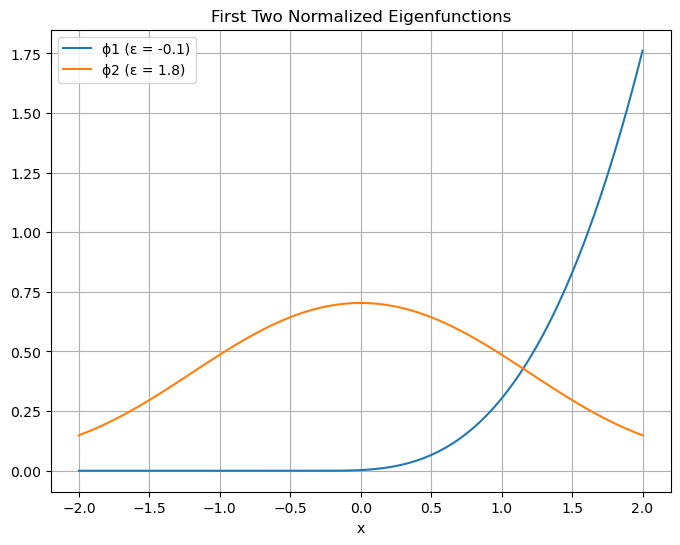

Eigenvalues: [-0.05        1.81774445]
Eigenfunctions Matrix:
 [[1.76969080e-06 1.48697246e-01]
 [1.95699811e-06 1.60093413e-01]
 [2.16345724e-06 1.72306744e-01]
 [2.39011865e-06 1.85320670e-01]
 [2.63807848e-06 1.99113619e-01]
 [2.90847316e-06 2.13658666e-01]
 [3.20248527e-06 2.28923191e-01]
 [3.52135208e-06 2.44868844e-01]
 [3.86637651e-06 2.61450706e-01]
 [4.23894485e-06 2.78618365e-01]
 [4.64055546e-06 2.96315112e-01]
 [5.07285411e-06 3.14478642e-01]
 [5.53768298e-06 3.33041584e-01]
 [6.03714510e-06 3.51931335e-01]
 [6.57368833e-06 3.71071470e-01]
 [7.15021412e-06 3.90381683e-01]
 [7.77021940e-06 4.09778944e-01]
 [8.43797647e-06 4.29178139e-01]
 [9.15877564e-06 4.48492826e-01]
 [9.93923352e-06 4.67636104e-01]
 [1.07877057e-05 4.86521440e-01]
 [1.17148576e-05 5.05063337e-01]
 [1.27344126e-05 5.23178139e-01]
 [1.38642346e-05 5.40784763e-01]
 [1.51278439e-05 5.57804927e-01]
 [1.65566453e-05 5.74164325e-01]
 [1.81932834e-05 5.89792318e-01]
 [2.00968457e-05 6.04622805e-01]
 [2.23512463e

In [19]:
# part (c) - +0.05 - A5  / A6
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def bvpexam_rhs(x, y, epsilon, w):
    return [y[1], (w * abs(y[0]**2) + x**2 - epsilon) * y[0]]  # Define non-linear ODE

w = 0.05  # Nonlinear parameter, positive in this iteration
L = 2     # Boundary limit for x, provided in problem
tol = 10**(-4)  # Convergence tolerance, per bottom of the HW

A5 = np.zeros((81, 2))  # Store 2 eigenfunctions
A6 = np.zeros(2)        # Store 2 eigenvalues

x = np.linspace(-L, L, 81)  # Grid of 81 points from -L to L
A = 0.05  # Initial derivative guess

for i in range(2): # iterate over 2 modes
    dA = 0.05  # initial step size for derivative adjustment
    A_mode = A  # separate variable for each mode, fix suggested by chat

    for j in range(1000):  # Limit to 1000 iterations
        # Ensure sqrt argument is non-negative
        if A_mode < L**2:
            y0 = [1, np.sqrt(L**2 - A_mode)]
        else:
            y0 = [1, 0]
        
        #solve ODE
        sol = solve_ivp( # Use solve_ivp with a stiff solver Radau, suggestion from chat
            bvpexam_rhs, [x[0], x[-1]], y0, args=(A_mode, w), t_eval=x, method='Radau',
            atol=1e-6, rtol=1e-6
        ) # t_eval=x Solves the problem with points in x

        if abs(sol.y[1, -1] + np.sqrt(L**2 - A_mode) * sol.y[0, -1]) < tol: # if convergence is within tolerance, break
            break
        if (-1)**(i + 1) * (sol.y[1, -1] + np.sqrt(L**2 - A_mode) * sol.y[0, -1]) > 0: # if not within tollerance, adjust initial derivative guess
            A_mode += dA
        else:
            A_mode -= dA
            dA /= 2  # Refine search

    # Another check of convergence since it didn't seem to work above
    if abs(sol.y[0, -1]) < tol:  # Ensure y is close to zero at x = ±L
        break

    # Interpolate sol.y[0] if it doesn’t match the length of x, suggestion from chat due to incorrect size output from solveivp
    if sol.y[0].size != x.size:
        interp_func = interp1d(sol.t, sol.y[0], kind='cubic', fill_value="extrapolate")
        ysol_mode = np.abs(interp_func(x) / np.sqrt(np.trapz(interp_func(x)**2, x))) # normalize
    else:
        ysol_mode = np.abs(sol.y[0] / np.sqrt(np.trapz(sol.y[0]**2, x))) # normalize

    A5[:, i] = ysol_mode  # Store eigenfunction
    A6[i] = A_mode        # Store eigenvalue

    A_mode += 0.2  # Slight increase for the next mode

# Plot normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(2):
    plt.plot(x, A5[:, i], label=f'ϕ{i+1} (ε = {A6[i]:.1f})')  # Plot eigenfunctions

plt.xlabel('x')
plt.title('First Two Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print("Eigenvalues:", A6)
print("Eigenfunctions Matrix:\n", A5)

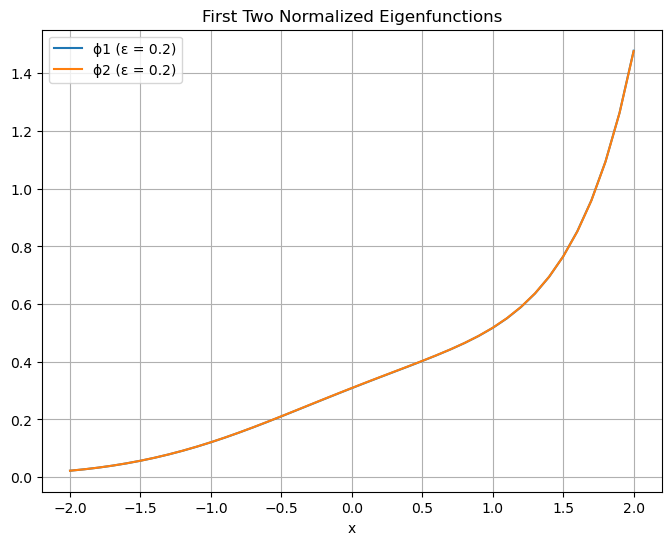

Eigenvalues: [0.2 0.2]
Eigenfunctions matrix A5: [[0.02229156 0.02232941]
 [0.02714217 0.0271883 ]
 [0.03294271 0.03299841]
 [0.03977921 0.03984608]
 [0.04772771 0.04780805]
 [0.05684915 0.05694536]
 [0.06718931 0.06730336]
 [0.07877857 0.0789121 ]
 [0.09161978 0.09177611]
 [0.10568444 0.10586553]
 [0.12091669 0.12112353]
 [0.13723339 0.1374666 ]
 [0.15452408 0.15478454]
 [0.17265097 0.1729405 ]
 [0.19145808 0.19177217]
 [0.2107846  0.21112498]
 [0.23041018 0.23078805]
 [0.2501439  0.25055962]
 [0.26983457 0.27028147]
 [0.2893708  0.28983888]
 [0.30868094 0.30916068]
 [0.32773309 0.32821922]
 [0.34653514 0.34703037]
 [0.36513473 0.36565354]
 [0.38373106 0.38421282]
 [0.40271432 0.40308981]
 [0.42227467 0.42257393]
 [0.44280494 0.44308026]
 [0.46492274 0.46523194]
 [0.48947049 0.48986025]
 [0.5175154  0.51800454]
 [0.55034951 0.55091225]
 [0.58948963 0.59003894]
 [0.63667741 0.6372613 ]
 [0.69443781 0.69486076]
 [0.76535675 0.76508745]
 [0.85221006 0.85146449]
 [0.95959261 0.95885764]
 

In [20]:
# (c) A5/A6 - Post office hours
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def bvpnonlinexam_rhs(x, y, E, w):
    return [y[1], (w * y[0]**2 + x**2 - E) * y[0]]  # Define non-linear ODE

w = 0.05 # Positive non-linear factor for A5 / A6
L = 2  # Boundary limit
tol = 1e-4  # Convergence tolerance
x = np.arange(-L, L + 0.1, 0.1)  # Range of x with step size 0.1
n = len(x)
dA = 0.01

# Initialize storage for eigenvalues and eigenfunctions
A5 = np.zeros((n, 2))  # Matrix for storing the eigenfunctions
A6 = np.zeros(2)       # Vector for storing the eigenvalues

modes = [0, 1]  # Iterate over first two modes

for i in range(2):
    E0, A = 0.1, 1e-6  # Initial guesses for energy and amplitude
    dE = 0.2  # Initial step size for energy
    
    for j in modes:
        for jj in range(1000):  # Iteration limit for convergence
            E = E0  # Set E to the current value of E0
            
            # Initial condition based on current guess
            y0 = [A, np.sqrt(L**2 - E) * A]
            
            # Solve the ODE for the given initial guess
            sol = solve_ivp(lambda x, y: bvpnonlinexam_rhs(x, y, E, w), [x[0], x[-1]], y0, t_eval=x)
            ys = sol.y
            xs = sol.t
            bc = ys[1, -1] + np.sqrt(L**2 - E) * ys[0, -1]  # Boundary condition check
            
            # Normalize the eigenfunction
            ysol_interp = np.interp(x, xs, ys[0])  # Interpolate the solution for consistent x
            ysol_mode = np.abs(ysol_interp / np.sqrt(np.trapz(ysol_interp**2, x)))  # Normalize
            
            # Check convergence of boundary condition
            if abs(bc) < tol:
                break  # Exit if converged
            
            # Adjust eigenvalue based on boundary condition sign
            if (-1)**j * bc > 0:
                E += dE
            else:
                E -= dE
        
        # Dynamically adjust dE based on how close we are to the boundary condition
        if abs(bc) < 0.1:  # If close to convergence
            dE *= 0.5  # Halve dE for finer adjustments
        elif abs(bc) > 1:  # If far from convergence
            dE *= 2.0  # Double dE for faster convergence

        # Check to avoid making dE too small
        if dE < 1e-6:  
            dE = 1e-6  # Set a minimum step size for stability

        # Adjust initial amplitude if not converged
        if (-1)**(j + 1) * (sol.y[1, -1] + np.sqrt(L**2 - E) * sol.y[0, -1]) > 0:
            A += dA
        else:
            A -= dA
            dA /= 2  # Refine search for initial amplitude

    # Save eigenfunction and eigenvalue
    A5[:, i] = ysol_mode  # Eigenfunction
    A6[i] = E  # Eigenvalue

# Plot the two normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(2):
    plt.plot(x, A5[:, i], label=f'ϕ{i+1} (ε = {A6[i]:.1f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Two Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print("Eigenvalues:", A6)
print("Eigenfunctions matrix A5:", A5)

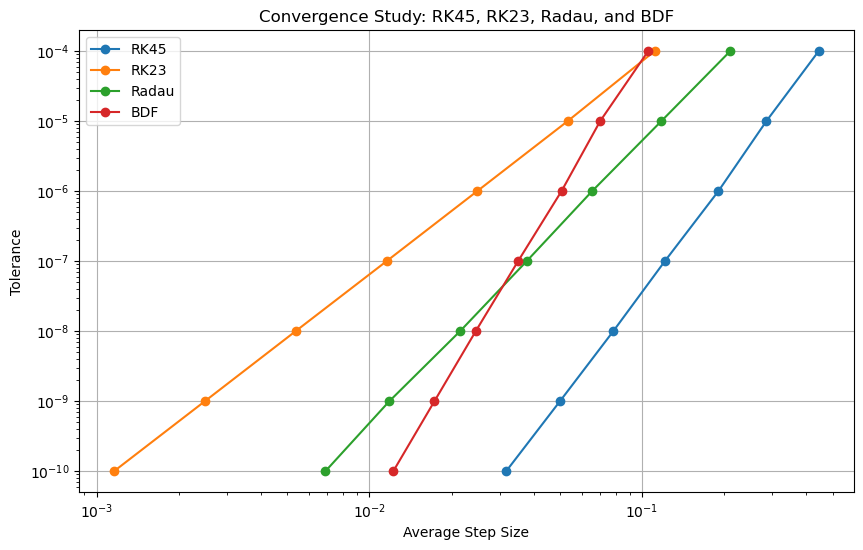

Slopes for RK45, RK23, Radau, and BDF: [5.24466756 3.01909953 4.03819927 6.45751261]


In [21]:
# adjust A1/A2 for (d) A9 - complete - seems accurate
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def bvphw2_rhs(x, y, epsilon): # Define the right-hand side of the equation
    return [y[1], (x**2 - epsilon) * y[0]]

epsilon = 1  # fixed value of energy provided by the problem
L = 2  # boundary limit provided by the problem
TOL = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]  # tolerances from the problem
xspan = [-L, L]  # x range
y0 = [1, np.sqrt(1 * L**2 - 1)]  # initial conditions provided by the problem

ave_steps_rk45 = [] # Store average step size for RK45
ave_steps_rk23 = [] # Store average step size for RK23
ave_steps_radau = [] # Store average step size for Radau
ave_steps_bdf = [] # Store average step size for BDF

for tol in TOL:
    options = {'rtol': tol, 'atol': tol}  # Fixed options by problem
    
    sol_rk45 = solve_ivp(bvphw2_rhs, xspan, y0, method='RK45', args=(epsilon,), **options) # Solve using RK45
    avg_step_rk45 = np.mean(np.diff(sol_rk45.t))  # Average step size
    ave_steps_rk45.append(avg_step_rk45)

    sol_rk23 = solve_ivp(bvphw2_rhs, xspan, y0, method='RK23', args=(epsilon,), **options) # Solve using RK23
    avg_step_rk23 = np.mean(np.diff(sol_rk23.t))  # Average step size
    ave_steps_rk23.append(avg_step_rk23)

    sol_radau = solve_ivp(bvphw2_rhs, xspan, y0, method='Radau', args=(epsilon,), **options) # Solve using Radau
    avg_step_radau = np.mean(np.diff(sol_radau.t))  # Average step size
    ave_steps_radau.append(avg_step_radau)

    sol_bdf = solve_ivp(bvphw2_rhs, xspan, y0, method='BDF', args=(epsilon,), **options) # Solve using BDF
    avg_step_bdf = np.mean(np.diff(sol_bdf.t))  # Average step size
    ave_steps_bdf.append(avg_step_bdf)

# Convert to numpy arrays for easier manipulation
ave_steps_rk45 = np.array(ave_steps_rk45)
ave_steps_rk23 = np.array(ave_steps_rk23)
ave_steps_radau = np.array(ave_steps_radau)
ave_steps_bdf = np.array(ave_steps_bdf)

# Log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(ave_steps_rk45, TOL, label='RK45', marker='o')
plt.loglog(ave_steps_rk23, TOL, label='RK23', marker='o')
plt.loglog(ave_steps_radau, TOL, label='Radau', marker='o')
plt.loglog(ave_steps_bdf, TOL, label='BDF', marker='o')
plt.xlabel('Average Step Size')
plt.ylabel('Tolerance')
plt.title('Convergence Study: RK45, RK23, Radau, and BDF')
plt.legend()
plt.grid(True)
plt.show()

# Calculate slopes using polyfit
slope_rk45 = np.polyfit(np.log10(ave_steps_rk45), np.log10(TOL), 1)[0]
slope_rk23 = np.polyfit(np.log10(ave_steps_rk23), np.log10(TOL), 1)[0]
slope_radau = np.polyfit(np.log10(ave_steps_radau), np.log10(TOL), 1)[0]
slope_bdf = np.polyfit(np.log10(ave_steps_bdf), np.log10(TOL), 1)[0]

# Update A9 with slopes for RK45, RK23, Radau, and BDF
A9 = np.array([slope_rk45, slope_rk23, slope_radau, slope_bdf])

print("Slopes for RK45, RK23, Radau, and BDF:", A9)

In [48]:
# (e) - A10/A11/A12/ A13 - size error
import numpy as np
from scipy.integrate import simpson
import math

L = 2
xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # Grid of points for solving ODE

# show eigenvalues from above to make sure they come into this cell correctly 
print("shooting method eigenvalues:", A2)
print("direct method eigenvalues:", A4)

exact_eigenvalues = np.array([1, 3, 5, 7, 9]) # Known exact eigenvalues for Gauss-Hermite polynomials (modes 0-4)

# Initialize storage for error vectors
A10 = np.zeros(5)  # Storage for Eigenfunction errors for part (a)
A11 = np.zeros(5)  # Storage for Eigenvalue errors for part (a)
A12 = np.zeros(5)  # Storage for Eigenfunction errors for part (b)
A13 = np.zeros(5)  # Storage for Eigenvalue errors for part (b)

def gauss_hermite_psi(n, x): # Define Gauss-Hermite polynomials for modes 0-4
    if n == 0:
        return np.pi**(-0.25) * np.exp(-0.5 * x**2)
    elif n == 1:
        return np.sqrt(2) * np.pi**(-0.25) * x * np.exp(-0.5 * x**2)
    elif n == 2:
        return (np.sqrt(2) * np.pi**0.25)**(-1) * (2 * x**2 - 1) * np.exp(-0.5 * x**2)
    elif n == 3:
        return (np.sqrt(3) * np.pi**0.25)**(-1) * (2 * x**3 - 3 * x) * np.exp(-0.5 * x**2)
    elif n == 4:
        return (2 * np.sqrt(6) * np.pi**0.25)**(-1) * (4 * x**4 - 12 * x**2 + 3) * np.exp(-0.5 * x**2)
    else:
        raise ValueError("This function supports modes 0 to 4 only.")

if numerical_psi_b.shape != exact_psi.shape: # check to see which shape is incorrect - per error, it's the numerical one that shows too big
    raise ValueError(f"Shape mismatch: numerical_psi_b {numerical_psi_b.shape}, exact_psi {exact_psi.shape}")
    
# Calculate error for part (a), save as A10 / A11
for n in range(5):
    exact_psi = np.abs(gauss_hermite_psi(n, x))
    numerical_psi_a = A1[:, x]
    
    # Eigenfunction error for part (a), save as A10
    psi_diff_a = np.abs(numerical_psi_a - exact_psi)
    A10[n] = np.sqrt(simpson(psi_diff_a**2, x=x))  # Integral of the square difference
    
    # Eigenvalue error for part (a), save as A11
    numerical_eigenvalue_a = A2[n]
    A11[n] = 100 * abs(numerical_eigenvalue_a - exact_eigenvalues[n]) / exact_eigenvalues[n]

# Calculate error for part (b), save as A12 / A13
for n in range(5):
    exact_psi = np.abs(gauss_hermite_psi(n, x))
    numerical_psi_b = A3[:, n]
    
    # Eigenfunction error for part (b), save as A12
    psi_diff_b = np.abs(numerical_psi_b - exact_psi)
    A12[n] = np.sqrt(simpson(psi_diff_b**2, x=x))  # Integral of the square difference
    
    # Eigenvalue error for part (b), save as A13
    numerical_eigenvalue_b = A4[n]
    A13[n] = 100 * abs(numerical_eigenvalue_b - exact_eigenvalues[n]) / exact_eigenvalues[n]

# Output the error matrices
print("Eigenfunction Errors for Part (a) (A10):", A10)
print("Eigenvalue Errors for Part (a) (A11):", A11)
print("Eigenfunction Errors for Part (b) (A12):", A12)
print("Eigenvalue Errors for Part (b) (A13):", A13)

shooting method eigenvalues: [0.99999991 2.99999923 4.99998925 6.99988278 8.99906002]
direct method eigenvalues: [0.99984472 2.99924791 4.9983709  6.99946772 9.0127754 ]


ValueError: Shape mismatch: numerical_psi_b (161,), exact_psi (81,)